In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_ds = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/NLP/sentiment_train', delimiter='\t')
train_ds

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [3]:
train_ds['text'].duplicated().sum()

5627

In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


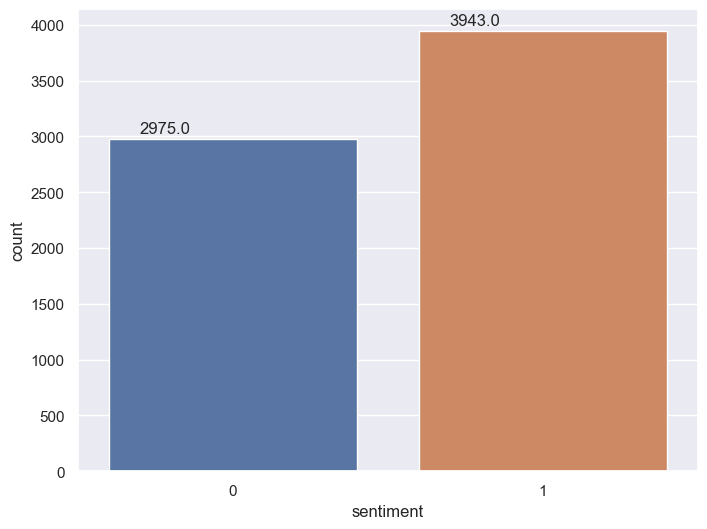

In [5]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='sentiment', data=train_ds)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

#This is a balanced dataset

In [6]:
review_volumes = train_ds['sentiment'].value_counts()

print(((review_volumes[0]/train_ds.shape[0]))*100)  #Percent of positive review
print(((review_volumes[1]/train_ds.shape[0]))*100)  #percent of negative review

43.00375831165076
56.99624168834924


## Count vector model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit(train_ds.text)
feature_vector

#Bag of words model

CountVectorizer()

In [8]:
features = feature_vector.get_feature_names_out()
print('Total no. of features :',len(features))

Total no. of features : 2132


In [9]:
type(features)

numpy.ndarray

In [11]:
import re
import random
random.sample(features, 50)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [12]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_df = pd.DataFrame(train_ds_features.toarray())
train_ds_df

,0,1,2,3,4,5,6,7,8,9,...,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_ds_df.shape

(6918, 2132)

In [14]:
train_ds_df.columns = features

In [15]:
train_ds_df

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_ds_df.iloc[0:1, 1000:1006]

,instead,insurance,intellectual,intense,interest,interested
0,0,0,0,0,0,0


In [17]:
features_count = np.sum(train_ds_features.toarray(), axis=0)
features_count

array([ 1,  1,  4, ...,  1, 80,  1])

In [18]:
features_count_df = pd.DataFrame(dict(features=features, counts=features_count))
features_count_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


Text(0, 0.5, 'Density of words')

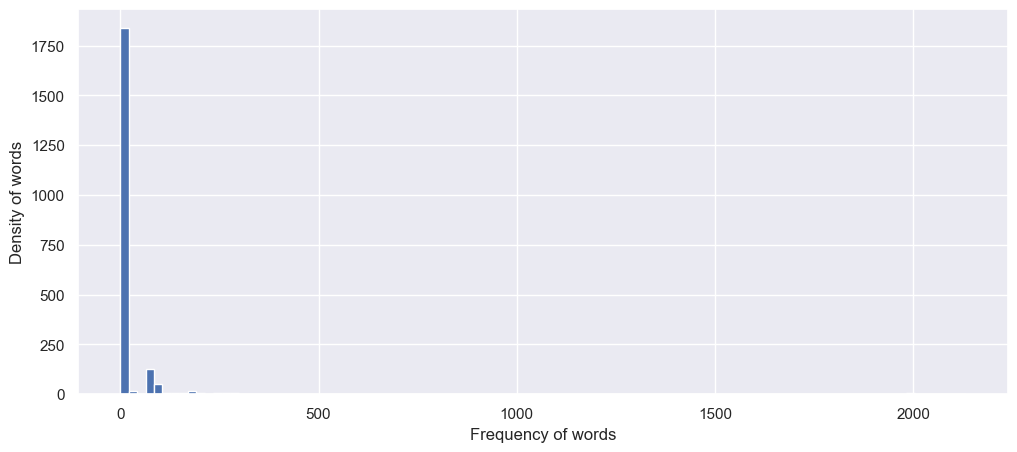

In [19]:
plt.figure(figsize=(12,5))
plt.hist(features_count_df.counts, bins=100, range=(0,2132))
plt.xlabel('Frequency of words')
plt.ylabel('Density of words')


In [20]:
#Bag of words
count_vectorizer = CountVectorizer(max_features=500)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count = pd.DataFrame(dict(features=features, counts=features_count))
feature_count

,features,counts
0,10,4
1,about,129
2,absolutely,101
3,acceptable,81
4,aching,80
...,...,...
495,yes,5
496,yet,8
497,you,331
498,your,9


In [21]:
#Removing stopwords
from sklearn.feature_extraction import text
eng_stop_words = text.ENGLISH_STOP_WORDS
len(eng_stop_words)

318

In [22]:
type(eng_stop_words)

frozenset

In [23]:
feature_count[1:20]

,features,counts
1,about,129
2,absolutely,101
3,acceptable,81
4,aching,80
5,acne,80
6,action,9
7,actually,14
8,after,20
9,again,88
10,all,38


In [24]:
#Bag of words with stop words and n-gram
count_vectorizer = CountVectorizer(stop_words=list(eng_stop_words), ngram_range=(1,2), max_features=500)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count = pd.DataFrame(dict(features=features, counts=features_count))
feature_count

,features,counts
0,absolutely,101
1,absolutely awesome,81
2,absolutely love,10
3,acceptable,81
4,aching,80
...,...,...
495,wotshisface needs,80
496,yeah,171
497,yeah got,80
498,zen,80


In [25]:
feature_count.sort_values('counts', ascending=False)[0:50]

,features,counts
157,harry,2093
158,harry potter,2093
339,potter,2093
55,code,2002
80,da,2001
81,da vinci,2001
469,vinci,2001
470,vinci code,2001
286,mountain,2000
43,brokeback,2000


In [26]:
# to add more words to stopword list
eng_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','movies','code'])
len(eng_stop_words)

322

In [27]:
#Bag of words with stop words
count_vectorizer = CountVectorizer(stop_words=list(eng_stop_words), max_features=500)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_count = np.sum(train_ds_features.toarray(), axis=0)
feature_count = pd.DataFrame(dict(features=features, counts=features_count))
feature_count

,features,counts
0,10,4
1,17,3
2,6th,3
3,absolutely,101
4,absurd,3
...,...,...
495,wrong,7
496,yeah,171
497,year,6
498,yes,5


In [28]:
feature_count.sort_values('counts', ascending=False)[0:50]

,features,counts
78,da,2001
469,vinci,2001
40,brokeback,2000
309,mountain,2000
276,love,1624
19,awesome,1127
304,mission,1094
222,impossible,1093
258,like,974
311,movie,783


## Model building

In [30]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df

,10,17,6th,absolutely,absurd,acceptable,aching,acne,action,actually,...,world,worth,worthless,wotshisface,write,wrong,yeah,year,yes,zen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_ds_df['sentiment'] = train_ds.sentiment
train_ds_df

,10,17,6th,absolutely,absurd,acceptable,aching,acne,action,actually,...,worth,worthless,wotshisface,write,wrong,yeah,year,yes,zen,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_ds_features, train_ds.sentiment, test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5188, 500) (1730, 500) (5188,) (1730,)


### Sentiment analysis/text anaysis - Naive Bayes theorem

In [37]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(x_train.toarray(), y_train)

BernoulliNB()

In [35]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
y_pred_train_nb = nb_clf.predict(x_train.toarray())
y_pred_test_nb = nb_clf.predict(x_test.toarray())

In [39]:
from sklearn.metrics import accuracy_score

print('Training accuracy :', accuracy_score(y_train, y_pred_train_nb))
print('Test accuracy :', accuracy_score(y_test, y_pred_test_nb))

Training accuracy : 0.9899768696993061
Test accuracy : 0.9895953757225433


In [ ]:
# TO Implement
''' 
1. Logistic regression
2. Decision tree
3. Random forest '''

### Building a pipeline


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [42]:
x_train, x_test, y_train, y_test = train_test_split(train_ds['text'], train_ds['sentiment'], test_size=0.25, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5188,) (1730,) (5188,) (1730,)


In [43]:
models = Pipeline([('BOW', CountVectorizer()), ('RF', RandomForestClassifier())])
models.fit(x_train, y_train)

Pipeline(steps=[('BOW', CountVectorizer()), ('RF', RandomForestClassifier())])

In [44]:
y_pred_train = models.predict(x_train)
y_pred_test = models.predict(x_test)

In [45]:
print('Training accuracy :', accuracy_score(y_train, y_pred_train))
print('Test accuracy :', accuracy_score(y_test, y_pred_test))

Training accuracy : 1.0
Test accuracy : 0.992485549132948


In [50]:
msg1 = ['This movie was awesome and I loved it']
msg2 = ['One of the worst movie I ever watches. Please dont waste your time and money']

In [51]:
print(models.predict(msg1))

[1]


In [52]:
print(models.predict(msg2))


[0]
